# Desafio - IGTI - Modulo 03 - MNIST
- Autor: Rodrigo de Lima Oliveira
- Data : 18/06/2020
- LinkedIn: https://www.linkedin.com/in/rodrigolima82/

## Descrição do Problema

**A base de dados MNIST**

Um dos mais clássicos conjuntos de dados para o treinamento e benchmark de algoritmos de classificação é o MNIST. Ele é composto por 70.000 imagens (60 mil de treino, 10 mil de teste) de números de 0 a 9 escritos à mão, já previamente classificados. Os números são sempre apresentados individualmente.

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_03/Desafio/image.png?raw=1)

Suponha que você trabalha em uma empresa que faz a leitura automática (OCR) de formulários e cheques para instituições financeiras, e que a você foi atribuído o trabalho de desenvolver um programa que faça a leitura de números escritos à mão nesses documentos. Um tratamento prévio das imagens já entrega a você os números individualmente em imagens de resolução similar.

Cabe a você usar o aprendizado de máquina para ler cada imagem e dizer, com margem de segurança alta, qual número foi escrito ali. Por falta de dados de teste, você usará o MNIST para treinar o seu algoritmo. Se seu algoritmo não tiver resultados excelentes, os números serão enviados para leitura e digitação manual, feita por operadores humanos, uma operação cara e pouco escalável.

**Referências:**

MNIST: http://yann.lecun.com/exdb/mnist/ (acesso em 09/06/2020)

Imagem: http://blog.welcomege.com/mnist-database/ (acesso em 29/04/2018)

## Carregando as bibliotecas

In [2]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools

# Imports de bibliotecas para treinamento de redes neurais convolucionais
import tensorflow as tf
#from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


In [4]:
# Caso aparece um erro do pacote nao instalado, executar o comando abaixo
!pip install watermark

# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Desafio - Modulo 03 - Rodrigo" --iversions

pandas     1.0.4
tensorflow 2.2.0
matplotlib 3.2.1
numpy      1.18.5
Desafio - Modulo 03 - Rodrigo


## Carregar os dados

In [5]:
# Carregando o dataset com imagens do MNIST direto do pacote do Tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Colocando os dados na mesma escala [0, 1]
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Realizando o redimensionamento para (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

print("X_train shape:", X_train.shape)
print(X_train.shape[0], " exemplos para treinamento")
print(X_test.shape[0], " exemplos para teste")

# Convertendo o target para uma matriz de classes (0 a 9)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000  exemplos para treinamento
10000  exemplos para teste


## Criação e Validação dos Modelos de Machine Learning

### Convolutional Neural Network

In [7]:
# Parametros do modelo
input_shape = (28, 28, 1)
batch_size  = 128
epochs      = 15

# Definicao da estrutura do modelo
model_cnn = Sequential()
model_cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation = "relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation = "softmax"))

# Instanciando a funcao de perda e a metrica de desempenho
model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Exibindo o resumo
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [10]:
# Realizando o treinamento do modelo CNN
model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 360s 7ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0293 - val_accuracy: 0.9917
Epoch 2/15
54000/54000 [==============================] - 354s 7ms/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 0.0259 - val_accuracy: 0.9927
Epoch 3/15
54000/54000 [==============================] - 359s 7ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0283 - val_accuracy: 0.9922
Epoch 4/15
54000/54000 [==============================] - 354s 7ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0218 - val_accuracy: 0.9943
Epoch 5/15
54000/54000 [==============================] - 363s 7ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0264 - val_accuracy: 0.9932
Epoch 6/15
54000/54000 [==============================] - 354s 7ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0215 - val_accuracy: 0.9952
Epoch 7/15
54000/54000 [==============================] - 358s 

In [11]:
# Avaliando o desempenho do modelo CNN com dados de teste
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.021437651656303916
Test accuracy: 0.9941999912261963


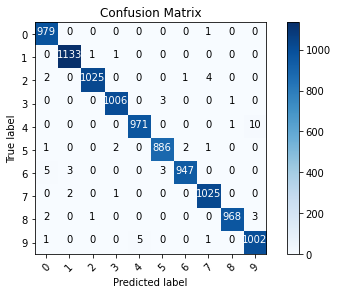

In [12]:
# Plot da Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Realiza as previsoes com o dataset de teste
y_pred = model_cnn.predict(X_test)

# Converte as previsoes em vetores one hot
y_pred_classes = np.argmax(y_pred, axis = 1) 

# Converte as observacoes em vetores one hot
y_true = np.argmax(y_test, axis = 1) 

# Executa a matriz de confusao
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# Exibindo a matriz de confusao
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

### Convolutional Neural Network Otimizada

In [13]:
# Configurando a reducao automatica da taxa de aprendizado
learning_rate_reduction = ReduceLROnPlateau(monitor  = 'val_acc', 
                                            patience = 3, 
                                            verbose  = 1, 
                                            factor   = 0.5, 
                                            min_lr   = 0.00001)

In [14]:
# Gerando novos dados com a técnica 'data augmentation'
datagen = ImageDataGenerator(featurewise_center            = False,
                             samplewise_center             = False,
                             featurewise_std_normalization = False,
                             samplewise_std_normalization  = False,
                             zca_whitening                 = False,
                             rotation_range                = 10,
                             zoom_range                    = 0.1,
                             width_shift_range             = 0.1,
                             height_shift_range            = 0.1,
                             horizontal_flip               = False,
                             vertical_flip                 = False)

datagen.fit(X_train)

In [ ]:
# Observacao: esta célula demora muito para ser executada
# Recomendo rodar esse otimizador em um computador com GPU

#epochs = 30

# Treinamento do modelo otimizado
#history = model_cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
#                                  epochs = epochs, 
#                                  validation_data = (X_test, y_test),
#                                  verbose = 2, 
#                                  steps_per_epoch = X_train.shape[0],
#                                  callbacks=[learning_rate_reduction])

Epoch 1/1


### Limitando os dados para responder o questionário

#### Realizando teste somente com números 1 a 4 e 300 exemplos de cada número

In [68]:
### Classificações dos números 1 a 4 com 300 exemplos de cada número

# Carregando o dataset com imagens do MNIST direto do pacote do Tensorflow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Criando a mascara para selecionar somente os labels de 1 a 4
test_mask  = np.isin(y_test, [1,2,3,4])

# Filtra o dataset somente com os labels indicados
X_test_, y_test_ = X_test[test_mask], y_test[test_mask]

# Filtra apenas 300 registros para label
X_test_  = X_test_[:1200,:,:]
y_test_  = y_test_[:1200]

In [69]:
# Verificando a quantidade de registro de teste para cada label de 1 a 4
tmp = pd.DataFrame(y_test_, columns=['label'])    
tmp['label'].value_counts()

1    316
2    298
4    295
3    291
Name: label, dtype: int64

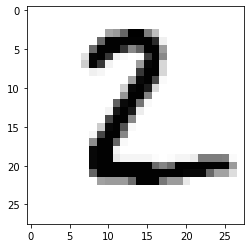

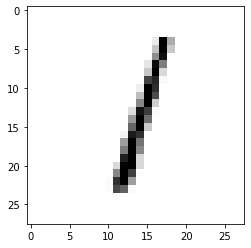

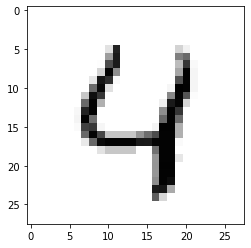

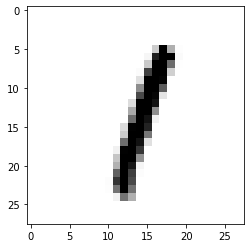

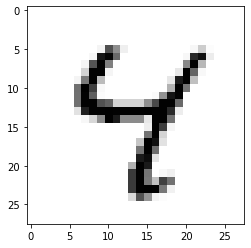

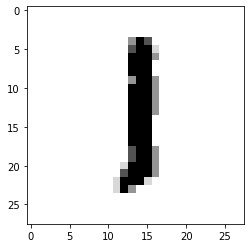

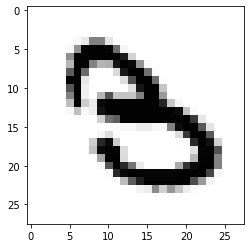

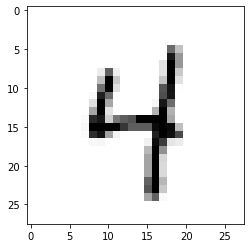

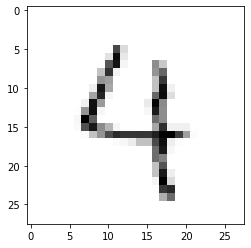

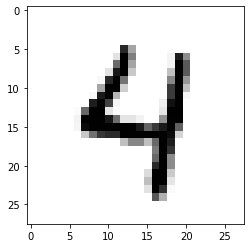

In [70]:
# Teste para exibir as imagens para teste
for i in range(10):
    img = X_test_[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()


## Questionário

**Pergunta 01:** Qual métrica de qualidade você considera a mais importante para medir o desempenho do seu algoritmo de classificação?

- **Acurácia - erros diferentes tem peso igual**
- Recall - não podemos deixar de classificar nenhum número
- Precisão - falsos positivos são inaceitáveis
- F-Score - entre recall e f-score há igual importância
 
**Pergunta 02:** Suponha que seu contratante lhe deu 5000 exemplos de números que seu programa terá que classificar. Os exemplos, no entanto, não foram classificados previamente. Que tipo de algoritmo você usaria para gerar um modelo para essa base de dados?

- Agrupamento
- **Classificação single label**
- Regressão
- Classificação multi label
 
**Pergunta 03:** Suponha que você gerou uma curva de validação para testar o desempenho do seu algoritmo. Na curva, você comparou o desempenho do seu modelo com o desempenho do algoritmo na validação cruzada. O resultado exibiu a sua curva acima da curva da validação cruzada, ou seja, com desempenho bem melhor, e as curvas não convergiram. O que isso significa?
*(Capítulo 7)*

- Baixa variância
- O modelo está bom para ir para produção
- Underfitting
- **Overfitting**
 
**Pergunta 04: **Para este tipo de problema, seu contratante te diz que é preferível que o algoritmo “erre sempre da mesma maneira” do que ele “erre de maneira errática”. Isso se dá porque, na etapa de conferência manual dos resultados incorretos, erros “previsíveis” são corrigidos  de forma mais barata. Que característica seria desejável seu algoritmo ter para que ele tivesse esse tipo de comportamento?

- Alta tendência e alta variância
- **Alta tendência e baixa variância**
- Baixa tendência e alta variância
- Baixa tendência e baixa variância
 
**Pergunta 05:** Suponha que, após um ano com o seu algoritmo em execução, você perceba que os valores dos cheques tendem a ter magnitudes diferentes em diferentes épocas do ano. No final do ano, por exemplo, o normal é a maior parte dos cheques ter seis ou oito dígitos, considerando os centavos, enquanto no meio do ano a quantidade de dígitos é um tanto menor. Se você souber dessa tendência com antecedência, sua empresa poderá ajustar a etapa de conferência manual de dígitos errados, gerando economia de custos.

Assim, você coleta de dados de “quantidade média de dígitos nos valores dos cheques” por “mês/ano”. Que técnica de aprendizado de máquina você usaria para tentar analisar esse comportamento e fazer previsões acerca dos meses futuros?

- F-Score
- Erro mediano absoluto
- Acurácia
- **Erro médio quadrático**
 
**Pergunta 06:** Suponha que seu cliente te enviou 2100 números classificados previamente para alimentar o treino do seu algoritmo. Você gera seu modelo. Um tempo depois, seu cliente pergunta se você precisa de mais dados. A obtenção desses dados acarretará em custos maiores, portanto não deve ser feita a não ser que vá trazer benefícios reais para seu algoritmo. Como você poderia descobrir se vale a pena trazer mais dados para o seu algoritmo?

- **Usando curvas de aprendizado**
- Usando validação cruzada
- Usando otimização de hiperparâmetros
- Nenhuma alternativa é a correta
 
**Pergunta 07:** A técnica de validação cruzada “deixar P elementos de fora”, para o problema sob análise, seria uma boa escolha? Justifique sua resposta.

- Sim - ela é a mais precisa e, portanto, vai nos dar maior confiabilidade
- Não - ela não trará resultados melhores que a K-Grupos.
- Sim - ela é a mais adequada para modelos de classificação
- **Não - ela é computacionalmente cara demais para ser viável**
 
**Pergunta 08:** Suponha que, num agrupamento para aquele conjunto de dados, teve-se valor elevado de entropia. O que isso melhor quer dizer em relação às imagens usadas no treino?

- Precisamos, necessariamente, de mais imagens.
- **As imagens estão se confundido umas com a outras. 1 com 7, por exemplo.**
- O modelo está com desempenho inaceitável para as imagens escolhidas
- As imagens estão bem separadas e o modelo está bom para ir para produção
 
**Pergunta 09:** Suponha que você tenha usado um classificador multilabel para resolver o seu problema. Marque a alternativa correta.

- A perda de hamming é a métrica de qualidade mais adequada aqui.
- Não é possível modelar o problema como um classificador multilabel, pois só há dois resultados possíveis: cheque correto (positivo) e cheque errado (negativo)
- A perda 0-1 é a métrica de qualidade mais adequada aqui.
- **Ambas a perda 0-1 e a perda de hamming são igualmente adequadas para resolver o problema.**
 
**Pergunta 10:** Qual técnica de validação cruzada você usaria para resolver o seu problema?

- A divisão de treino e teste - nessa escala de problema, é a única viável
- Deixar P elementos de fora - ela é a mais precisa e, portanto, vai nos dar maior confiabilidade
- A divisão de treino e teste - a perda de dados é aceitável para esse problema
- **A validação cruzada em k-grupos - é boa mas não é tão cara computacionalmente**
 
**Pergunta 11:** Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.
Calcule a acurácia para cada número

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_03/Desafio/pergunta11.png?raw=1)

- Para 1 a 4, respectivamente: 0.834, 0.758, 0.817, 0.9084
- Para 1 a 4, respectivamente: 0.9584, 0.758, 0.723, 0.814
- Para 1 a 4, respectivamente: 0.758, 0.912, 0.817, 0.834
- Para 1 a 4, respectivamente: 0.9084, 0.758, 0.817, 0.834
 
**Pergunta 12:** Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.
Calcule a precisão para cada número.

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_03/Desafio/pergunta12.png?raw=1)

- Para 1 a 4, respectivamente: 0.80, 0.42, 0.625, 0.86
- Para 1 a 4, respectivamente: 0.85, 0.42, 0.625, 0.656
- Para 1 a 4, respectivamente: 0.85, 0.52, 0.625, 0.656
- Para 1 a 4, respectivamente: 0.80, 0.52, 0.625, 0.86
 
**Pergunta 13:** Considere a seguinte matriz de confusão de um teste para as classificações dos números 1 a 4. São 300 exemplos de cada número.
Calcule o recall para cada número.

![title](https://github.com/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/Modulo_03/Desafio/pergunta13.png?raw=1)

- Para 1 a 4, respectivamente: 0.77, 0.55, 0.66, 0.60
- Para 1 a 4, respectivamente: 0.72, 0.55, 0.66, 0.60
- Para 1 a 4, respectivamente: 0.77, 0.50, 0.66, 0.70
- Para 1 a 4, respectivamente: 0.72, 0.50, 0.66, 0.70
 
**Pergunta 14:** Na técnica de validação cruzada “divisão 70-30”

- A divisão dos dados deve ser, sempre, 30% para treino e 70% para teste.
- **A divisão dos dados deve ser, sempre, 70% para treino e 30% para teste**.
- Não há regra sobre qual proporção dos dados deve ir para treino e teste.
- Nenhuma das alternativas está correta.
 
**Pergunta 15:** O problema descrito melhor se classifica como um problema de…

- Classificação multi label
- **Classificação single label**
- Regressão
- Classificação single ou multi label, a depender da modelagem